# Text sentiment analysis AI project

# Data description
id: Row Id 

ProductId: Unique identifier for the product

UserId: Unqiue identifier for the user

ProfileName: Profile name of the user

HelpfulnessNumerator: Number of users who found the review helpful

HelpfulnessDenominator: Number of users who indicated whether they found the review helpful or not

Score: Rating between 1 and 5

Time: Timestamp for the review

Summary: Brief summary of the review

Text:  Text of the review

In [2]:
import os
from sentiment_utils import * ## this is a python script that contains helper functions
# if did not import properly please copy its conttent in a cell
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import numpy as np
import random
import nltk
from sklearn import preprocessing
from tqdm import tqdm_notebook
import gc #garbage collector
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

In [0]:
#preprocessing
from nltk.corpus import stopwords  #stopwords
from nltk import word_tokenize,sent_tokenize # tokenizing

from nltk.stem import WordNetLemmatizer  # lammatizer from WordNet
from nltk.tokenize import WordPunctTokenizer

# for part-of-speech tagging
from nltk import pos_tag

# for named entity recognition (NER)
from nltk import ne_chunk

from wordcloud import WordCloud

# vectorizers for creating the document-term-matrix (DTM)
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

# BeautifulSoup libraray
from bs4 import BeautifulSoup as bf

import re # regex
#model_selection
from sklearn.model_selection import train_test_split, cross_val_score

#evaluation
from sklearn.metrics import accuracy_score,roc_auc_score 
from sklearn.metrics import classification_report
from mlxtend.plotting import plot_confusion_matrix

#preprocessing scikit
from sklearn.preprocessing import MinMaxScaler,StandardScaler,Imputer,LabelEncoder
#classifiaction.
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


In [3]:
# to get the data from my drive
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [4]:
import tensorflow as tf
#keras
from tensorflow.python.keras import backend as k
from tensorflow.keras.preprocessing.text import one_hot,Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten, Embedding,Input,LSTM, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.text import text_to_word_sequence

#gensim w2v
#word2vec
from gensim.models import Word2Vec
 


# Helper function

### these function will be used in the work below

In [4]:
df = pd.read_csv("../data/Reviews.csv")


In [6]:
df.head(8)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...


In [0]:
df.shape

(568454, 10)

In [0]:
df.nunique()

Id                        568454
ProductId                  74258
UserId                    256059
ProfileName               218416
HelpfulnessNumerator         231
HelpfulnessDenominator       234
Score                          5
Time                        3168
Summary                   295742
Text                      393579
dtype: int64

C:\Users\khalil\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\khalil\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


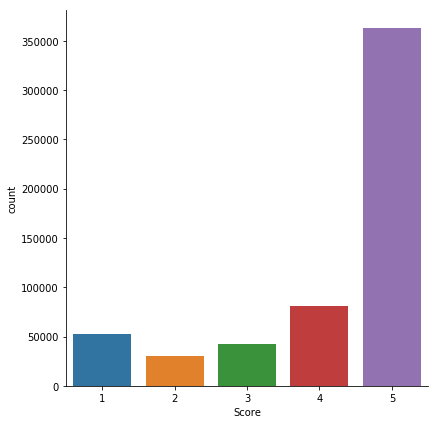

In [0]:
sns.factorplot(x="Score", data=df, kind="count", size=6)
plt.show()

## Data preparation and cleaning 

In [0]:
testing = main_data_df.Text[:100]
test_result = []
for t in testing:
    test_result.append(text_cleaning(t))

In [0]:
#parsing the text and clean it using 'text_cleaning' helper function
batches = [0 , 100000,200000,300000,400000,568454]
print("Cleaning and parsing the Texts content.....\n")
clean_text = []
for k in range(5):
    for i in tqdm_notebook(range(batches[k],batches[k+1])):
        clean_text.append(text_cleaning(main_data_df["Text"][i]))

In [0]:
clean_df = pd.DataFrame(clean_text,columns=["Text"])
clean_df['Score'] = working_data['Score']
clean_df.head()

In [0]:
## saving the cleaned text to a csv file 
#clean_df.to_csv('clean_text_reviews.csv', encoding='utf-8')

## Load the cleaned data from the last part

In [0]:
# clean_df = pd.read_csv('/content/drive/My Drive/sentiment_analysis/clean_text_reviews.csv')
new = clean_df[['Text','Score']]

In [0]:
new.head()

,Text,Score
0,have bought several of the vitality canned dog...,5
1,product arrived labeled as jumbo salted peanut...,1
2,this is confection that has been around few ce...,4
3,if you are looking for the secret ingredient i...,2
4,great taffy at great price there was wide asso...,5


In [8]:
# check if we have null values
print(new['Score'].isnull().sum())
print(new['Text'].isnull().sum()) # ther is 8 null text values 
new = new.dropna()# new['Text'].isnull()  

0
8


In [0]:
# add column of the length of the text
#new['len']= [len(t) for t in new.Text]

In [0]:
new.shape

(568446, 2)

In [0]:
new.head()

,Text,Score
0,have bought several of the vitality canned dog...,5
1,product arrived labeled as jumbo salted peanut...,1
2,this is confection that has been around few ce...,4
3,if you are looking for the secret ingredient i...,2
4,great taffy at great price there was wide asso...,5


### removing duplicates and nan values


In [0]:
# remove duplicates/ for every duplicate we will keep only one row of that type. 
new.drop_duplicates(subset=['Score','Text'],keep='first',inplace=True)

In [0]:
# now check the shape. so we haven't duplicated data
print(new.shape)

(393135, 2)


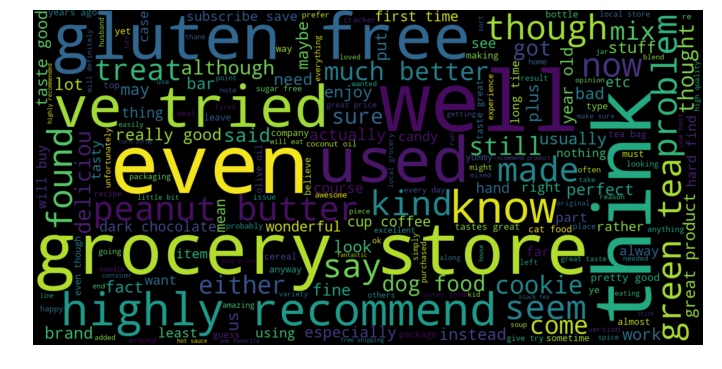

In [0]:
#word_cloud
string = []
for t in new.Text:
    string.append(t)
string = pd.Series(string).str.cat(sep=' ')
wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Build the word embadding model using Word2Vec

In [0]:
# Tokenize sentences
sentences = []
print("Parsing sentences...")
for review in new["Text"]:
    
    sentences.append(nltk.word_tokenize(review))
print('Finish parsing')

Parsing sentences...
Finish parsing


In [0]:
# Creating the model and setting values for the various parameters
num_features = 300  # Word vector dimensionality
min_word_count = 40 # Minimum word count
num_workers = 4     # Number of parallel threads
context = 10        # Context window size
downsampling = 1e-3 # (0.001) Downsample setting for frequent words

# Initializing the train model
from gensim.models import word2vec
print("Training model....")
model = word2vec.Word2Vec(sentences,\
                          workers=num_workers,\
                          size=num_features,\
                          min_count=min_word_count,\
                          window=context,
                          sample=downsampling)

# To make the model memory efficient
model.init_sims(replace=True)

# Saving the model for later use. Can be loaded using Word2Vec.load()
model_name = "word2Vec_model.bin"
model.save(model_name)

Training model....


In [1]:
#loading the model tha just have been saved
model = Word2Vec.load('word2Vec_model.bin')

In [0]:
# Few tests: This will print the odd word among them
model.wv.doesnt_match("man woman dog child kitchen".split())

C:\Users\khalil\AppData\Local\Programs\Python\Python37\lib\site-packages\gensim\models\keyedvectors.py:877: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'kitchen'

In [0]:
# This will print the most similar words present in the model
model.wv.most_similar("eat")

[('consume', 0.6087640523910522),
 ('devour', 0.602520227432251),
 ('feed', 0.5977225303649902),
 ('eating', 0.5680657029151917),
 ('eats', 0.5587198734283447),
 ('ate', 0.5310823917388916),
 ('spoil', 0.5139713883399963),
 ('indulge', 0.5034332275390625),
 ('tolerate', 0.46549955010414124),
 ('chew', 0.4479042887687683)]

In [0]:
# This will give the total number of words in the vocabolary created from this dataset
model.wv.syn0.shape

(9330, 300)

In [0]:
# feature vectore of just one sentence
featureVecMethod(new1['Text'][0], model, num_features)

array([ 1.13940369e-02, -7.07464875e-04, -4.14239988e-02, -4.29730257e-03,
        4.04860417e-04,  3.75382695e-03, -2.03683227e-02, -1.81196276e-02,
       -4.34099371e-03, -2.93266606e-02, -2.56937742e-02,  1.60184354e-02,
        2.52187587e-02,  1.50028123e-02,  1.18052661e-02, -3.46618239e-03,
        6.21838588e-03, -5.98712964e-03,  1.21292584e-02,  1.09530976e-02,
        8.20695888e-03, -1.64783522e-02, -3.31244022e-02, -3.69552546e-03,
       -7.57976947e-03,  6.36667199e-03, -1.33070238e-02, -1.14761451e-02,
       -5.56664634e-03,  6.18091412e-03,  5.48700150e-03,  7.39455689e-03,
       -1.84447579e-02, -1.82881262e-02, -1.27637014e-02,  1.00439824e-02,
        1.32392291e-02,  1.66967809e-02,  1.61287263e-02,  2.09590085e-02,
        1.16983131e-02, -5.82573703e-03,  6.56567933e-03, -5.37197851e-03,
       -3.97795951e-03, -1.14839710e-02,  1.70986131e-02,  1.89903453e-02,
       -1.54860988e-02,  1.93881951e-02,  7.38232397e-03, -3.11636104e-04,
        3.74949566e-04, -

## Testing binary classification (bad or good)

In [0]:
#so we will convert the values in score 
#column to sentiment. Sentiment is 0 for ratings or scores less than 3 and 1 or + elsewhere
def sentiment(Score):
    if(Score<=3):
        return 0
    else:
        return 1

In [0]:
new['binary_Score'] = new['Score'].apply(sentiment)

In [0]:
#changing the order of columns
new = new[['Text','binary_Score']]

In [0]:
new.head()

,Text,binary_Score
0,have bought several of the vitality canned dog...,1
1,product arrived labeled as jumbo salted peanut...,0
2,this is confection that has been around few ce...,1
3,if you are looking for the secret ingredient i...,0
4,great taffy at great price there was wide asso...,1


### Testing some ML models

In [0]:
# making the dataset 
# X is the average vector of the words embedding
X = getAvgFeatureVecs(new1['Text'], model, num_features)
Y = new1['binary_Score']

Review 0 of 186710
Review 1000 of 186710
Review 2000 of 186710
Review 3000 of 186710
Review 4000 of 186710
Review 5000 of 186710
Review 6000 of 186710
Review 7000 of 186710
Review 8000 of 186710
Review 9000 of 186710
Review 10000 of 186710
Review 11000 of 186710
Review 12000 of 186710
Review 13000 of 186710
Review 14000 of 186710
Review 15000 of 186710
Review 16000 of 186710
Review 17000 of 186710
Review 18000 of 186710
Review 19000 of 186710
Review 20000 of 186710
Review 21000 of 186710
Review 22000 of 186710
Review 23000 of 186710
Review 24000 of 186710
Review 25000 of 186710
Review 26000 of 186710
Review 27000 of 186710
Review 28000 of 186710
Review 29000 of 186710
Review 30000 of 186710
Review 31000 of 186710
Review 32000 of 186710
Review 33000 of 186710
Review 34000 of 186710
Review 35000 of 186710
Review 36000 of 186710
Review 37000 of 186710
Review 38000 of 186710
Review 39000 of 186710
Review 40000 of 186710
Review 41000 of 186710
Review 42000 of 186710
Review 43000 of 186710
R

In [0]:
#divide out data to test and train
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [0]:
#from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 100)
    
print("Fitting random forest to training data....")    
forest = forest.fit(x_train, y_train)

Fitting random forest to training data....


In [0]:
forest.score(x_test, y_test)

0.8126506346740935

In [0]:
clf = LogisticRegression().fit(x_train, y_train)
clf.score(x_test, y_test)

0.8373681109742381

In [0]:
score = cross_val_score(clf,X,Y,cv=10,scoring='accuracy',verbose=1)
score.mean()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  2.1min finished


0.837019977505222

# Modeling with Deep learning

In [0]:
# remove duplicates/ for every duplicate we will keep only one row of that type. 
new.drop_duplicates(subset=['Score','Text'],keep='first',inplace=True)

In [0]:
new2 = new[:]

In [12]:
new2 = new2.sample(frac=1).reset_index(drop=True)
print(new2.shape)  
new2.head()

(393134, 2)


,Text,Score
0,anyone who loves chocolate would like these co...,5
1,these are large crunchy yummy peanuts it fresh...,5
2,this blend is very easy to enjoy the pleasing ...,4
3,ordered these to decorate cake pops ve never u...,3
4,my pups eagerly await the ups box that the lbs...,5


In [0]:
new2.dropna(subset=['Text'],inplace=True)

In [0]:
print(new2['Text'].isna().sum())

0


In [0]:
new2['Score'].value_counts()

5    250422
4     56002
1     36185
3     29735
2     20790
Name: Score, dtype: int64

In [14]:
# preparing data to fed to the model
X_deep = getAvgFeatureVecs(new2['Text'], model, num_features=300)
y_deep = new2['Score']
y_deep = np.asarray(y_deep,dtype=int)
# transforming the target to one_hot vector
y_deep = convert_to_one_hot(y_deep,C=5)

Review 0 of 393134
Review 1000 of 393134
Review 2000 of 393134
Review 3000 of 393134
Review 4000 of 393134
Review 5000 of 393134
Review 6000 of 393134
Review 7000 of 393134
Review 8000 of 393134
Review 9000 of 393134
Review 10000 of 393134
Review 11000 of 393134
Review 12000 of 393134
Review 13000 of 393134
Review 14000 of 393134
Review 15000 of 393134
Review 16000 of 393134
Review 17000 of 393134
Review 18000 of 393134
Review 19000 of 393134
Review 20000 of 393134
Review 21000 of 393134
Review 22000 of 393134
Review 23000 of 393134
Review 24000 of 393134
Review 25000 of 393134
Review 26000 of 393134
Review 27000 of 393134
Review 28000 of 393134
Review 29000 of 393134
Review 30000 of 393134
Review 31000 of 393134
Review 32000 of 393134
Review 33000 of 393134
Review 34000 of 393134
Review 35000 of 393134
Review 36000 of 393134
Review 37000 of 393134
Review 38000 of 393134
Review 39000 of 393134
Review 40000 of 393134
Review 41000 of 393134
Review 42000 of 393134
Review 43000 of 393134
R

In [0]:
X_deep.shape

(242712, 300)

In [0]:
y_deep.shape

(242712,)

In [15]:
# making the deep learnig model
deep = Sequential()
deep.add(Input((1,X_deep.shape[-1]), dtype='float32'))
deep.add(LSTM(128,return_sequences=True))
deep.add(Dropout(0.5))
deep.add(LSTM(128,return_sequences=False))
deep.add(Dropout(0.2))
deep.add(Dense(5, activation='softmax'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
deep.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
x_train, x_val, y_train, y_val = train_test_split(X_deep,y_deep, test_size=0.20, random_state=42)

In [0]:
deep.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 128)            219648    
_________________________________________________________________
dropout (Dropout)            (None, 1, 128)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 5)                 645       
Total params: 351,877
Trainable params: 351,877
Non-trainable params: 0
_________________________________________________________________


In [0]:
x_train = x_train.reshape(x_train.shape[0],1,x_train.shape[-1])
x_val = x_val.reshape(x_val.shape[0],1,x_val.shape[-1])
#y_train = y_train.reshape(y_train.shape[0],1,y_train.shape[-1])
#y_test = y_test.reshape(y_test.shape[0],1,y_test.shape[-1])

In [19]:
history = deep.fit(x_train, y_train, epochs = 50, batch_size=128, verbose=1, validation_data=(x_val,y_val))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 314507 samples, validate on 78627 samples
Epoch 1/50
314507/314507 [==============================] - 19s 60us/sample - loss: 0.8533 - acc: 0.6870 - val_loss: 0.7799 - val_acc: 0.7063
Epoch 2/50
314507/314507 [==============================] - 16s 52us/sample - loss: 0.7875 - acc: 0.7055 - val_loss: 0.7722 - val_acc: 0.7080
Epoch 3/50
314507/314507 [==============================] - 16s 52us/sample - loss: 0.7816 - acc: 0.7069 - val_loss: 0.7673 - val_acc: 0.7103
Epoch 4/50
314507/314507 [==============================] - 17s 53us/sample - loss: 0.7776 - acc: 0.7085 - val_loss: 0.7628 - val_acc: 0.7110
Epoch 5/50
314507/314507 [==============================] - 16s 51us/sample - loss: 0.7748 - acc: 0.7098 - val_loss: 0.7620 - val_acc: 0.7113
Epoch 6/50
314507/314507 [==============================] - 16s 52us/sample - loss: 0.7713 - acc: 0.7111 - val_loss: 0.7577 - val_acc: 0.7135
Epo

In [0]:
# evaluate the validation set
#loss, acc = deep.evaluate(x_test,y_test)

78627/78627 [==============================] - 6s 80us/sample - loss: 0.7328 - acc: 0.7249


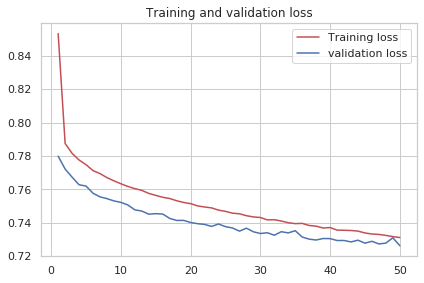

In [22]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

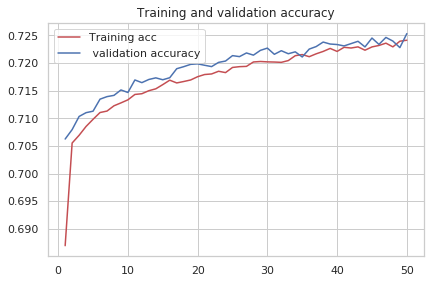

In [23]:
acc = history.history['acc']
val_acc = history.history['val_acc']
epochs = range(1, len(acc) + 1)
plt.figure()
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label=' validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

In [0]:
def predict_review(text):
  opinions_dict = {1:"Very bad",2:"Bad",3:"Not bad",4:"Good",5:"Very good"}
  text = text_cleaning(text)
  text_vec = featureVecMethod(text, model, num_features=300)
  text_vec = text_vec.reshape(1,1,text_vec.shape[-1])
  score = np.argmax(deep.predict(text_vec)) + 1
  print("Rating : %d  , Opinion: %s"%(score,opinions_dict[score]))


In [25]:
predict_review("WOW I like this meal, its very delicious!")

Rating : 5  , Opinion: Very good
